In [4]:
import numpy as np
import pandas as pd

import pytraj as pt
import mdtraj as md
import pyemma

import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys

from glob import glob

In [2]:
def set_style():
    plt.style.use(['seaborn-ticks', 'seaborn-notebook'])
    matplotlib.rc("font", family="Arial")

In [3]:
rf0=pt.load('./parm_rst/closed6_dry_rot0.rst7', './parm_rst/closed6_dry_rot0.parm7')
rf1=pt.load('./parm_rst/closed6_dry_rot1.rst7', './parm_rst/closed6_dry_rot1.parm7')
rf2=pt.load('./parm_rst/closed6_dry_rot2.rst7', './parm_rst/closed6_dry_rot2.parm7')
rf3=pt.load('./parm_rst/closed6_dry_rot3.rst7', './parm_rst/closed6_dry_rot3.parm7')
rf4=pt.load('./parm_rst/closed6_dry_rot4.rst7', './parm_rst/closed6_dry_rot4.parm7')
rf5=pt.load('./parm_rst/closed6_dry_rot5.rst7', './parm_rst/closed6_dry_rot5.parm7')

rfopen=pt.load('./parm_rst/open10_dry.rst7', './parm_rst/open10_dry.parm7')

In [6]:
A=pt.analysis.matrix.dist(traj=rf0, mask='@CA', top='./parm_rst/closed6_dry_rot0.parm7', 
                          dtype='ndarray', mat_type='full')

In [7]:
A

array([[ 0.        ,  3.79383763,  5.54893098, ..., 41.47818504,
        43.94644102, 45.80106002],
       [ 3.79383763,  0.        ,  3.78875428, ..., 40.57230373,
        43.16156093, 45.13215699],
       [ 5.54893098,  3.78875428,  0.        , ..., 38.17659378,
        40.57910202, 42.7404963 ],
       ...,
       [41.47818504, 40.57230373, 38.17659378, ...,  0.        ,
         3.80386619,  5.24304616],
       [43.94644102, 43.16156093, 40.57910202, ...,  3.80386619,
         0.        ,  3.81134005],
       [45.80106002, 45.13215699, 42.7404963 , ...,  5.24304616,
         3.81134005,  0.        ]])

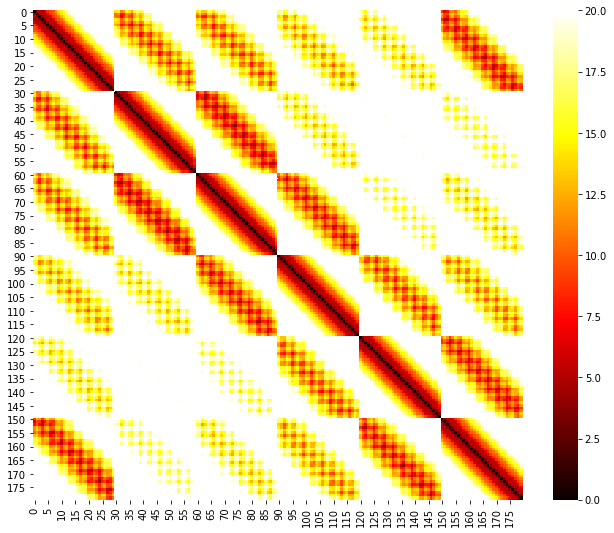

In [16]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(A, cmap='hot', vmax=20,
            square=True, xticklabels=5, yticklabels=5,
            ax=ax)
#plt.savefig('matrix_covar.png')

In [17]:
B=pt.analysis.matrix.dist(traj=rfopen, mask='@CA', top='./parm_rst/closed6_dry_rot0.parm7', 
                          dtype='ndarray', mat_type='full')

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


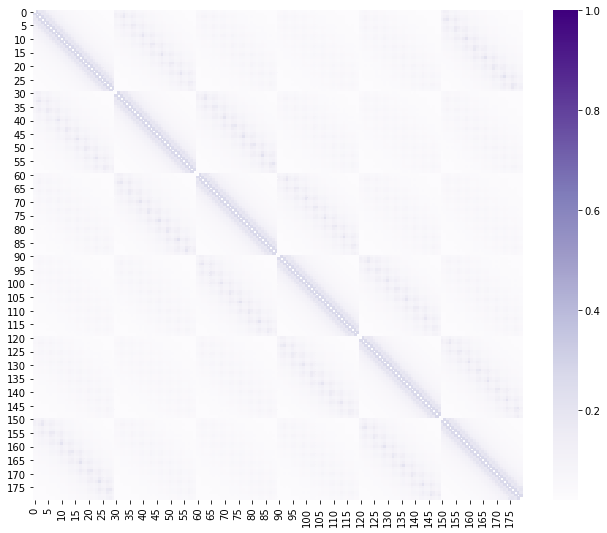

In [29]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(1/B, cmap='Purples', vmax=1,
            square=True, xticklabels=5, yticklabels=5,
            ax=ax)
#plt.savefig('matrix_covar.png')

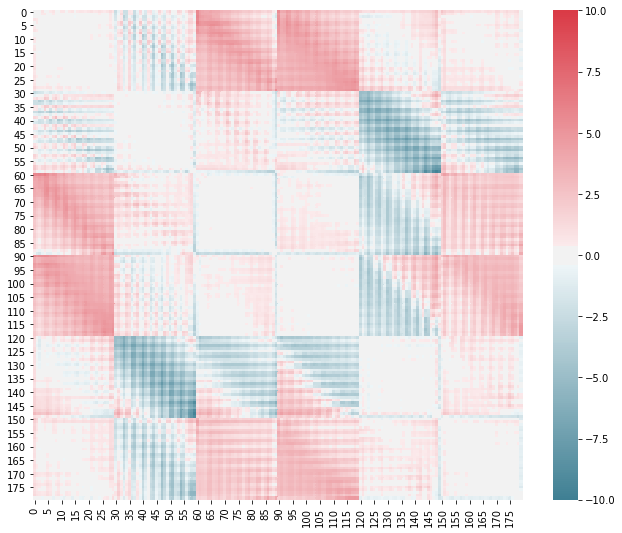

In [26]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(B-A, cmap=cmap, vmax=10, vmin=-10,
            square=True, xticklabels=5, yticklabels=5,
            ax=ax)
#plt.savefig('matrix_covar.png')

In [35]:
C=pt.analysis.matrix.dist(traj=rf0, mask=':ALA,@CA', top='./parm_rst/closed6_dry_rot0.parm7', 
                          dtype='ndarray', mat_type='full')
D=pt.analysis.matrix.dist(traj=rfopen, mask=':ALA,@CA', top='./parm_rst/closed6_dry_rot0.parm7', 
                          dtype='ndarray', mat_type='full')

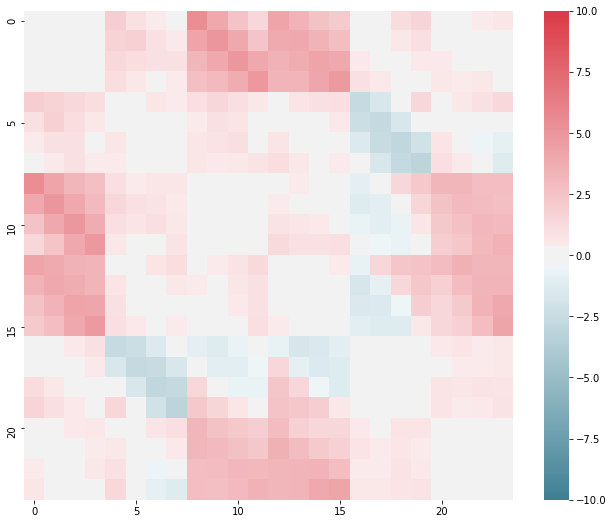

In [37]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(D-C, cmap=cmap, vmax=10, vmin=-10,
            square=True, xticklabels=5, yticklabels=5,
            ax=ax)
#plt.savefig('matrix_covar.png')

In [39]:
E=pt.analysis.matrix.dist(traj=rf1, mask=':ALA,@CA', top='./parm_rst/closed6_dry_rot0.parm7', 
                          dtype='ndarray', mat_type='full')
D=pt.analysis.matrix.dist(traj=rfopen, mask=':ALA,@CA', top='./parm_rst/closed6_dry_rot0.parm7', 
                          dtype='ndarray', mat_type='full')

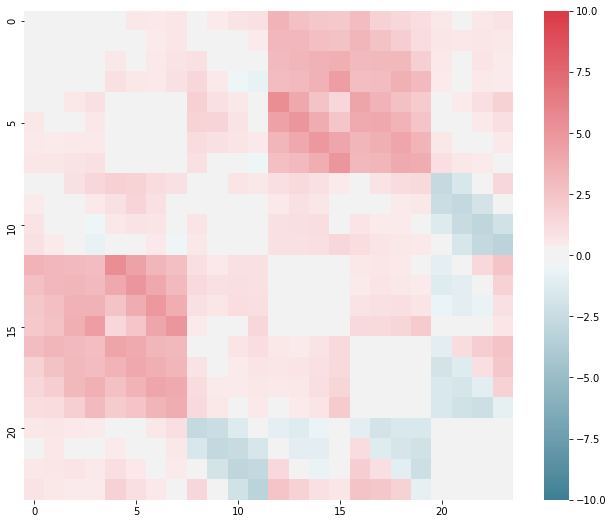

In [40]:
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with correct aspect ratio
sns.heatmap(D-E, cmap=cmap, vmax=10, vmin=-10,
            square=True, xticklabels=5, yticklabels=5,
            ax=ax)
#plt.savefig('matrix_covar.png')

In [41]:
pt.radgyr(rfopen)

array([16.17703104])

In [42]:
pt.radgyr(rf0)

array([16.08493659])

In [43]:
pt.radgyr(rf1)

array([16.08493659])

In [44]:
indir = './traj_dry_noeq_without_ipa'
topfile = './parm_rst/open10_dry.parm7'

traj_list = sorted(glob(indir+'/*.nc'))
traj_list

['./traj_dry_noeq_without_ipa/closed_dry_1.nc',
 './traj_dry_noeq_without_ipa/closed_dry_10.nc',
 './traj_dry_noeq_without_ipa/closed_dry_2.nc',
 './traj_dry_noeq_without_ipa/closed_dry_3.nc',
 './traj_dry_noeq_without_ipa/closed_dry_4.nc',
 './traj_dry_noeq_without_ipa/closed_dry_5.nc',
 './traj_dry_noeq_without_ipa/closed_dry_6.nc',
 './traj_dry_noeq_without_ipa/closed_dry_7.nc',
 './traj_dry_noeq_without_ipa/closed_dry_8.nc',
 './traj_dry_noeq_without_ipa/closed_dry_9.nc',
 './traj_dry_noeq_without_ipa/open_dry_1.nc',
 './traj_dry_noeq_without_ipa/open_dry_10.nc',
 './traj_dry_noeq_without_ipa/open_dry_2.nc',
 './traj_dry_noeq_without_ipa/open_dry_3.nc',
 './traj_dry_noeq_without_ipa/open_dry_4.nc',
 './traj_dry_noeq_without_ipa/open_dry_5.nc',
 './traj_dry_noeq_without_ipa/open_dry_6.nc',
 './traj_dry_noeq_without_ipa/open_dry_7.nc',
 './traj_dry_noeq_without_ipa/open_dry_8.nc',
 './traj_dry_noeq_without_ipa/open_dry_9.nc']

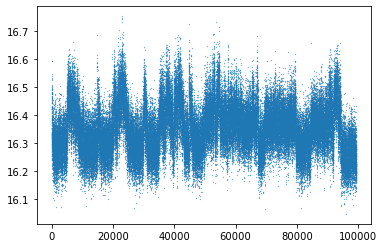

In [53]:
results_rgyr=[]
for t in traj_list:
    traj=pt.load(t, topfile, stride=10) 
    rgyr_traj=pt.radgyr(traj)
    results_rgyr.append(rgyr_traj)
rgyr_all=np.concatenate(results_rgyr, axis=0)

plt.plot(rgyr_all, marker=".", ms=0.5, ls='None') 

In [51]:
results_open=[]
results_closed=[]
for t in traj_list:
    traj=pt.load(t, topfile, stride=10)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open.append(rmsd_open)

rmsd_open_all=np.concatenate(results_open, axis=0)
rmsd_closed_all=np.concatenate(results_closed, axis=0)

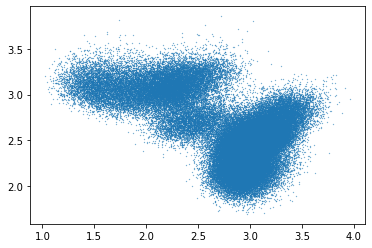

In [52]:
plt.plot(rmsd_closed_all, rmsd_open_all, marker=".", ms=0.5, ls='None') 

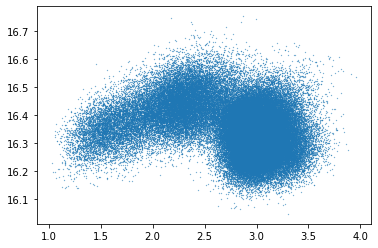

In [54]:
plt.plot(rmsd_closed_all, rgyr_all, marker=".", ms=0.5, ls='None') 

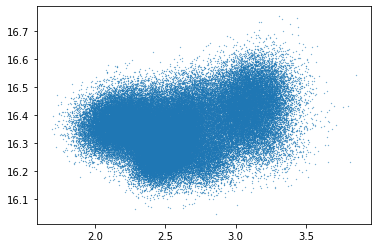

In [56]:
plt.plot(rmsd_open_all, rgyr_all, marker=".", ms=0.5, ls='None') 

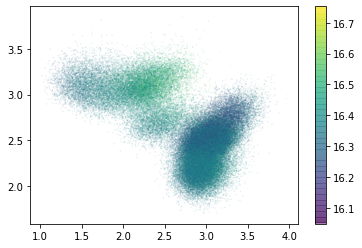

In [59]:
plt.scatter(rmsd_closed_all, rmsd_open_all,s=0.05, marker='.',c=rgyr_all, alpha=0.5)
cbar = plt.colorbar()

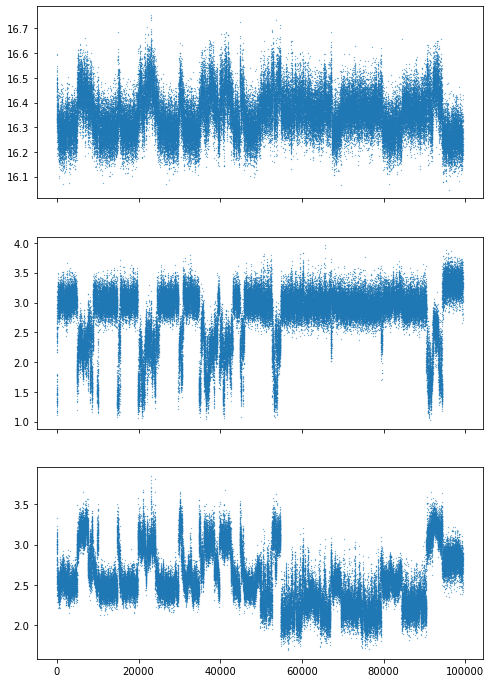

In [63]:
fig, axes = plt.subplots(3, 1, figsize=( 8, 12), sharex=True, sharey=False)
axes[0].plot(rgyr_all, marker=".", ms=0.5, ls='None') 
axes[1].plot(rmsd_closed_all, marker=".", ms=0.5, ls='None') 
axes[2].plot(rmsd_open_all, marker=".", ms=0.5, ls='None') 

In [67]:
indir = './traj_dry_adapt_without_ipa_1'
topfile = './parm_rst/open10_dry.parm7'

traj_list2 = sorted(glob(indir+'/*.nc'))
traj_list2

['./traj_dry_adapt_without_ipa_1/adapt1_dry_1.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_10.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_100.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_101.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_102.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_105.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_11.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_110.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_114.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_115.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_117.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_118.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_125.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_129.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_13.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_132.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_133.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_134.nc',
 './traj_dry_adapt_without_ipa_1/adapt1_dry_135.nc'

In [69]:
results_open2=[]
results_closed2=[]
for t in traj_list2:
    traj=pt.load(t, topfile, stride=5)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed2.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open2.append(rmsd_open)

rmsd_open_all2=np.concatenate(results_open2, axis=0)
rmsd_closed_all2=np.concatenate(results_closed2, axis=0)

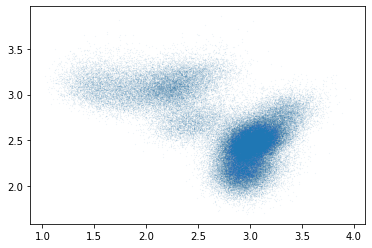

In [71]:
plt.plot(rmsd_closed_all, rmsd_open_all, marker=".", ms=0.05, ls='None') 

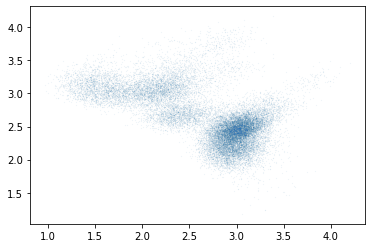

In [72]:
plt.plot(rmsd_closed_all2, rmsd_open_all2, marker=".", ms=0.05, ls='None') 

In [73]:
traj

pytraj.Trajectory, 200 frames: 
Size: 0.012553 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, PBC with box type = truncoct>
           

In [ ]:
frame_indices=range(0, 10

In [89]:
traj=pt.load('./traj_dry_adapt_without_ipa_1/adapt1_dry_1.nc', topfile, frame_indices=range(100, 1000, 5))

In [90]:
traj

pytraj.Trajectory, 180 frames: 
Size: 0.011297 (GB)
<Topology: 2808 atoms, 192 residues, 6 mols, PBC with box type = truncoct>
           

In [91]:
results_open3=[]
results_closed3=[]
for t in traj_list2:
    traj=pt.load(t, topfile, frame_indices=range(100, 1000, 5))
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed3.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open3.append(rmsd_open)

rmsd_open_all3=np.concatenate(results_open2, axis=0)
rmsd_closed_all3=np.concatenate(results_closed2, axis=0)

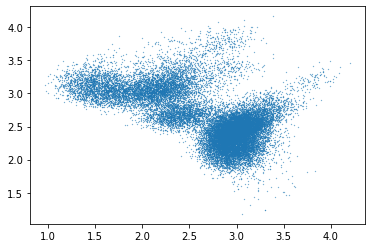

In [93]:
plt.plot(rmsd_closed_all3, rmsd_open_all3, marker=".", ms=0.5, ls='None') 

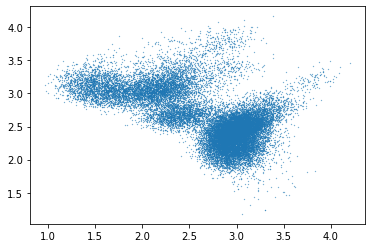

In [94]:
plt.plot(rmsd_closed_all2, rmsd_open_all2, marker=".", ms=0.5, ls='None') 

In [95]:
rmsd_open_all4=np.concatenate([rmsd_open_all,rmsd_open_all2], axis=0)
rmsd_closed_all4=np.concatenate([rmsd_closed_all,rmsd_closed_all2], axis=0)

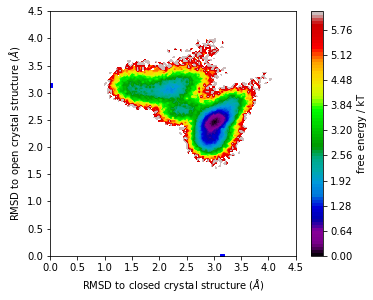

In [99]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all4, rmsd_open_all4, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))


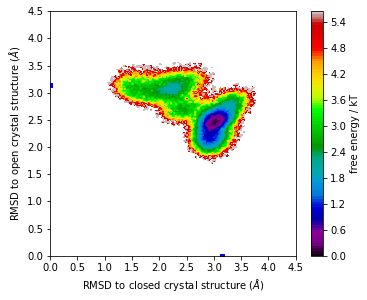

In [98]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all, rmsd_open_all, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

In [100]:
indir = './traj_dry_eq_with_ipa_2'
topfile = './parm_rst/open10_dry.parm7'

traj_list3 = sorted(glob(indir+'/*.nc'))
traj_list3

['./traj_dry_eq_with_ipa_2/open_ipa_dry_1.nc',
 './traj_dry_eq_with_ipa_2/open_ipa_dry_2.nc',
 './traj_dry_eq_with_ipa_2/open_ipa_dry_3.nc',
 './traj_dry_eq_with_ipa_2/open_ipa_dry_4.nc',
 './traj_dry_eq_with_ipa_2/open_ipa_dry_5.nc']

In [105]:
results_open5=[]
results_closed5=[]
for t in traj_list3:
    traj=pt.load(t, topfile,frame_indices=range(200, 10200, 10))
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed5.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open5.append(rmsd_open)

In [108]:
rmsd_open_all5=np.concatenate(results_open5, axis=0)
rmsd_closed_all5=np.concatenate(results_closed5, axis=0)

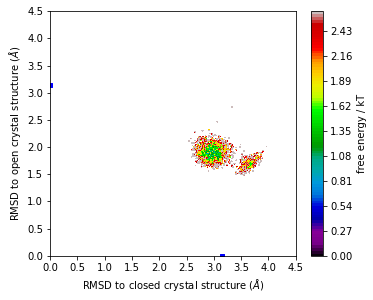

In [109]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all5, rmsd_open_all5, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

In [110]:
Y=[]
for i in range(0,len(results_open5)):  
    Z=[]
    for j in range(0,len(results_open5[i])):
        a=np.array([results_closed5[i][j],results_open5[i][j]])
        Z.append(a)
    Z=np.array(Z)
    Y.append(Z)
print(len(Y))
print(len(Y[0]))
print(len(Y[0][0]))

5
1000
2


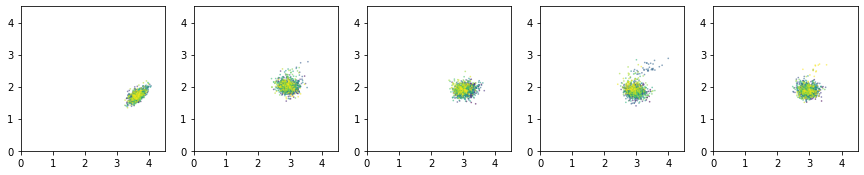

In [118]:
fig, axes = plt.subplots(1, 5, figsize=(15,20), sharex=False, sharey=False)
for i, ax in enumerate(axes.flat):
    ax.scatter(Y[i][:,0], Y[i][:,1],s=0.5, marker='o',c=range(0,len(Y[i])), alpha=0.5)
    
    ax.set_xlim(0,4.5)
    ax.set_xticks(np.arange(0, 5, 1))    
    ax.set_ylim(0,4.5)
    ax.set_yticks(np.arange(0, 5, 1))     
    ax.set_aspect('equal')



In [8]:
indir = './traj_dry_noeq_without_ipa'
topfile = './parm_rst/open10_dry.parm7'

traj_list = sorted(glob(indir+'/*.nc'))
traj_list

['./traj_dry_noeq_without_ipa/closed_dry_1.nc',
 './traj_dry_noeq_without_ipa/closed_dry_10.nc',
 './traj_dry_noeq_without_ipa/closed_dry_2.nc',
 './traj_dry_noeq_without_ipa/closed_dry_3.nc',
 './traj_dry_noeq_without_ipa/closed_dry_4.nc',
 './traj_dry_noeq_without_ipa/closed_dry_5.nc',
 './traj_dry_noeq_without_ipa/closed_dry_6.nc',
 './traj_dry_noeq_without_ipa/closed_dry_7.nc',
 './traj_dry_noeq_without_ipa/closed_dry_8.nc',
 './traj_dry_noeq_without_ipa/closed_dry_9.nc',
 './traj_dry_noeq_without_ipa/open_dry_1.nc',
 './traj_dry_noeq_without_ipa/open_dry_10.nc',
 './traj_dry_noeq_without_ipa/open_dry_2.nc',
 './traj_dry_noeq_without_ipa/open_dry_3.nc',
 './traj_dry_noeq_without_ipa/open_dry_4.nc',
 './traj_dry_noeq_without_ipa/open_dry_5.nc',
 './traj_dry_noeq_without_ipa/open_dry_6.nc',
 './traj_dry_noeq_without_ipa/open_dry_7.nc',
 './traj_dry_noeq_without_ipa/open_dry_8.nc',
 './traj_dry_noeq_without_ipa/open_dry_9.nc']

In [9]:
results_open=[]
results_closed=[]
for t in traj_list:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed.append(rmsd_closed)
    
    rmsd_open=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open.append(rmsd_open)

In [10]:
rmsd_open_all=np.concatenate(results_open, axis=0)
rmsd_closed_all=np.concatenate(results_closed, axis=0)

In [1]:
plt.plot(rmsd_closed_all, rmsd_open_all, marker=".", ms=0.005, ls='None') 

NameError: name 'plt' is not defined

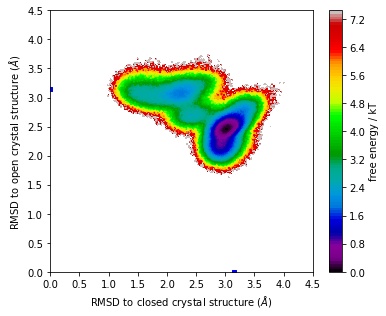

In [12]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all, rmsd_open_all, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_cmap.png', dpi=800)

In [13]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'

traj_list2 = sorted(glob(indir+'/*.nc'))
traj_list2

['./traj_dry_noeq_with_ipa/closed_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_9.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_9.nc']

In [14]:
results_open_ipa=[]
results_closed_ipa=[]
for t in traj_list2:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa.append(rmsd_closed_ipa)
    
    rmsd_open_ipa=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa.append(rmsd_open_ipa)

In [15]:
rmsd_open_ipa_all=np.concatenate(results_open_ipa, axis=0)
rmsd_closed_ipa_all=np.concatenate(results_closed_ipa, axis=0)

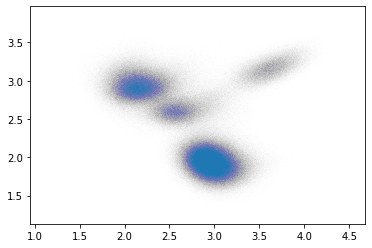

In [59]:
plt.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker=".", ms=0.005, ls='None') 

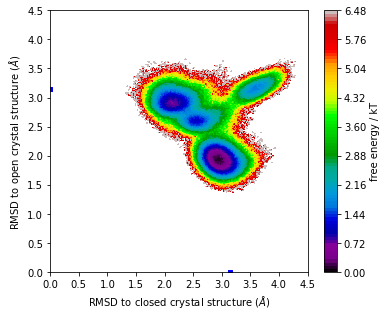

In [60]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_all, rmsd_open_ipa_all, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_IPA_cmap.png', dpi=800)

In [18]:
indir = './traj_dry_noeq_without_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/open*.nc'))
traj_list3

['./traj_dry_noeq_without_ipa/open_dry_1.nc',
 './traj_dry_noeq_without_ipa/open_dry_10.nc',
 './traj_dry_noeq_without_ipa/open_dry_2.nc',
 './traj_dry_noeq_without_ipa/open_dry_3.nc',
 './traj_dry_noeq_without_ipa/open_dry_4.nc',
 './traj_dry_noeq_without_ipa/open_dry_5.nc',
 './traj_dry_noeq_without_ipa/open_dry_6.nc',
 './traj_dry_noeq_without_ipa/open_dry_7.nc',
 './traj_dry_noeq_without_ipa/open_dry_8.nc',
 './traj_dry_noeq_without_ipa/open_dry_9.nc']

In [19]:
results_open_openonly=[]
results_closed_openonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_openonly.append(rmsd_closed_openonly)
    
    rmsd_open_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_openonly.append(rmsd_open_openonly)

In [20]:
rmsd_open_openonly=np.concatenate(results_open_openonly, axis=0)
rmsd_closed_openonly=np.concatenate(results_closed_openonly, axis=0)

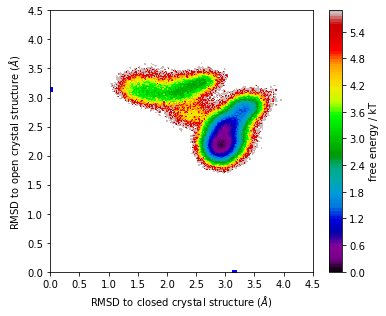

In [21]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_cmap.png', dpi=800)

In [22]:
indir = './traj_dry_noeq_without_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list4 = sorted(glob(indir+'/closed*.nc'))
traj_list4

['./traj_dry_noeq_without_ipa/closed_dry_1.nc',
 './traj_dry_noeq_without_ipa/closed_dry_10.nc',
 './traj_dry_noeq_without_ipa/closed_dry_2.nc',
 './traj_dry_noeq_without_ipa/closed_dry_3.nc',
 './traj_dry_noeq_without_ipa/closed_dry_4.nc',
 './traj_dry_noeq_without_ipa/closed_dry_5.nc',
 './traj_dry_noeq_without_ipa/closed_dry_6.nc',
 './traj_dry_noeq_without_ipa/closed_dry_7.nc',
 './traj_dry_noeq_without_ipa/closed_dry_8.nc',
 './traj_dry_noeq_without_ipa/closed_dry_9.nc']

In [23]:
results_open_closedonly=[]
results_closed_closedonly=[]
for t in traj_list4:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

In [24]:
rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

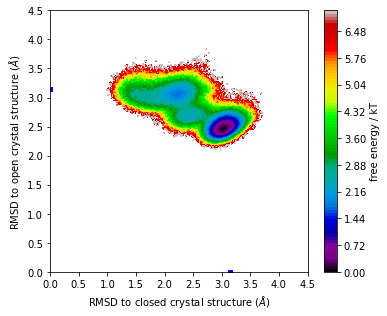

In [25]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_cmap.png', dpi=800)

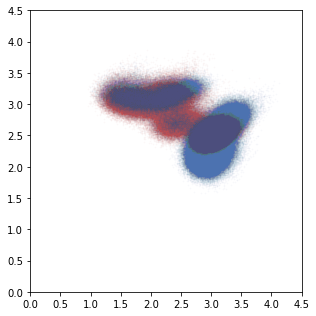

In [26]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02) 
ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/rmsd_fromclosed_fromopen.png', dpi=400)

In [27]:
len(rmsd_closed_closedonly)

497571

In [28]:
len(rmsd_open_closedonly)

497571

In [29]:
len(rmsd_open_openonly)

496163

In [30]:
len(rmsd_closed_openonly)

496163

In [31]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list5 = sorted(glob(indir+'/open*.nc'))
traj_list5

['./traj_dry_noeq_with_ipa/open_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/open_ipa_dry_9.nc']

In [32]:
results_open_ipa_openonly=[]
results_closed_ipa_openonly=[]
for t in traj_list5:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa_openonly.append(rmsd_closed_ipa_openonly)
    
    rmsd_open_ipa_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa_openonly.append(rmsd_open_ipa_openonly)

In [33]:
rmsd_open_ipa_openonly=np.concatenate(results_open_ipa_openonly, axis=0)
rmsd_closed_ipa_openonly=np.concatenate(results_closed_ipa_openonly, axis=0)

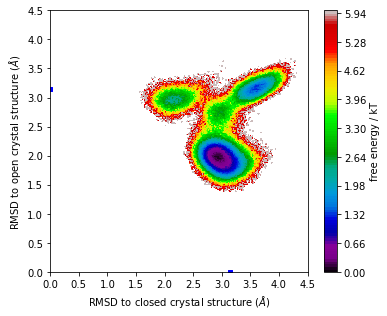

In [34]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_openonly, rmsd_open_ipa_openonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_ipa_cmap.png', dpi=800)

In [35]:
indir = './traj_dry_noeq_with_ipa'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list6 = sorted(glob(indir+'/closed*.nc'))
traj_list6

['./traj_dry_noeq_with_ipa/closed_ipa_dry_1.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_10.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_2.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_3.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_4.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_5.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_6.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_7.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_8.nc',
 './traj_dry_noeq_with_ipa/closed_ipa_dry_9.nc']

In [36]:
results_open_ipa_closedonly=[]
results_closed_ipa_closedonly=[]
for t in traj_list6:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_ipa_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_ipa_closedonly.append(rmsd_closed_ipa_closedonly)
    
    rmsd_open_ipa_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_ipa_closedonly.append(rmsd_open_ipa_closedonly)

In [37]:
rmsd_open_ipa_closedonly=np.concatenate(results_open_ipa_closedonly, axis=0)
rmsd_closed_ipa_closedonly=np.concatenate(results_closed_ipa_closedonly, axis=0)

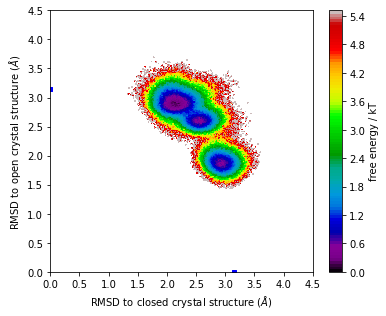

In [38]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa_closedonly, rmsd_open_ipa_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_ipa_cmap.png', dpi=800)

In [39]:
len(rmsd_closed_ipa_closedonly)

500000

In [40]:
len(rmsd_open_ipa_closedonly)

500000

In [41]:
len(rmsd_closed_ipa_openonly)

500000

In [42]:
for i in range(0,len(results_open_ipa_openonly)):
    print(len(results_open_ipa_openonly[i]))

50000
50000
50000
50000
50000
50000
50000
50000
50000
50000


In [43]:
for i in range(0,len(results_open_ipa_closedonly)):
    print(len(results_open_ipa_closedonly[i]))

50000
50000
50000
50000
50000
50000
50000
50000
50000
50000


In [44]:
indir = './rep_struct_1'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list7 = sorted(glob(indir+'/*.pdb'))
traj_list7

['./rep_struct_1/0.pdb',
 './rep_struct_1/1.pdb',
 './rep_struct_1/2.pdb',
 './rep_struct_1/3.pdb',
 './rep_struct_1/4.pdb',
 './rep_struct_1/5.pdb']

In [45]:
results_open_rep_struct=[]
results_closed_rep_struct=[]
for t in traj_list7:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_rep_struct=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_rep_struct.append(rmsd_closed_rep_struct)
    
    rmsd_open_rep_struct=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_rep_struct.append(rmsd_open_rep_struct)

In [46]:
rmsd_open_rep_struct=np.concatenate(results_open_rep_struct, axis=0)
rmsd_closed_rep_struct=np.concatenate(results_closed_rep_struct, axis=0)

In [47]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(rmsd_open_rep_struct_ipa)):
        plt.text(rmsd_closed_rep_struct_ipa[i]+0.04, rmsd_open_rep_struct_ipa[i]+0.04, 
                 i, fontsize=10, color='white')

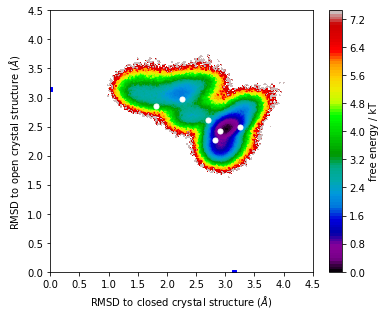

In [48]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_all, rmsd_open_all, nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct, rmsd_open_rep_struct, linewidth=0, marker='o', markersize=5, color='white')

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
# fig.savefig('./plots/FES_rmsd_cmap.png', dpi=800)

In [49]:
indir = './rep_struct_ipa_1'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list8 = sorted(glob(indir+'/*.pdb'))
traj_list8

['./rep_struct_ipa_1/0.pdb',
 './rep_struct_ipa_1/1.pdb',
 './rep_struct_ipa_1/2.pdb',
 './rep_struct_ipa_1/3.pdb']

In [50]:
results_open_rep_struct_ipa=[]
results_closed_rep_struct_ipa=[]
for t in traj_list8:
    traj=pt.load(t, topfile)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_rep_struct_ipa=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_rep_struct_ipa.append(rmsd_closed_rep_struct_ipa)
    
    rmsd_open_rep_struct_ipa=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_rep_struct_ipa.append(rmsd_open_rep_struct_ipa)

In [51]:
rmsd_open_rep_struct_ipa=np.concatenate(results_open_rep_struct_ipa, axis=0)
rmsd_closed_rep_struct_ipa=np.concatenate(results_closed_rep_struct_ipa, axis=0)

In [52]:
rmsd_open_rep_struct_ipa

array([2.1590297 , 1.8054539 , 2.69445467, 2.66681716])

In [53]:
rmsd_closed_rep_struct_ipa

array([2.4567451 , 2.90197249, 3.38740526, 2.10944768])

In [54]:
def plot_labels(ax=None):
    #if ax is None:
        #ax = gca()
    for i in range(0,len(rmsd_open_rep_struct_ipa)):
        plt.text(rmsd_closed_rep_struct_ipa[i]+0.04, rmsd_open_rep_struct_ipa[i]+0.04, 
                 i, fontsize=10, color='white')

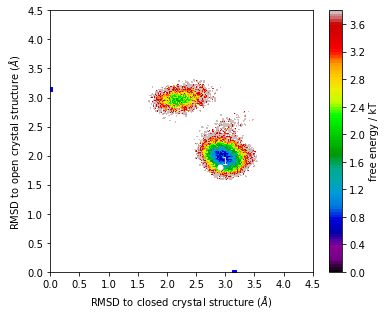

In [55]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_ipa, rmsd_open_ipa, nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct_ipa, rmsd_open_rep_struct_ipa, linewidth=0, marker='o', markersize=5, color='white')

plot_labels()

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

In [56]:
Y_ipa=[]
for i in range(0,len(results_open_ipa)):  
    Z_ipa=[]
    for j in range(0,len(results_open_ipa[i])):
        a_ipa=np.array([results_closed_ipa[i][j],results_open_ipa[i][j]])
        Z_ipa.append(a_ipa)
    Z_ipa=np.array(Z_ipa)
    Y_ipa.append(Z_ipa)

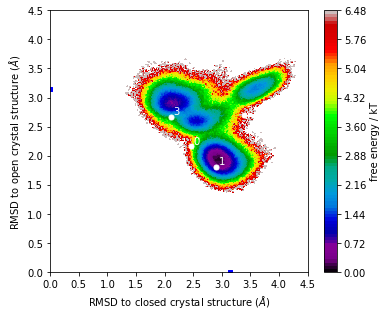

In [57]:
fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(np.vstack(Y_ipa)[:, 0], np.vstack(Y_ipa)[:, 1], nbins=200,ax=ax, cbar=True)

ax.plot(rmsd_closed_rep_struct_ipa, rmsd_open_rep_struct_ipa, linewidth=0, marker='o', markersize=5, color='white')

plot_labels()

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

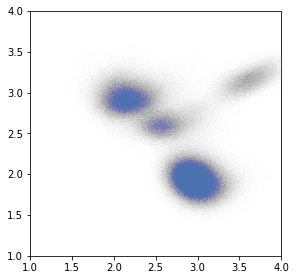

In [74]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02)


ax.set_xlim(1,4)
ax.set_ylim(1, 4)


fig.savefig('./plots/rmsd_w_IPA.png', dpi=400)

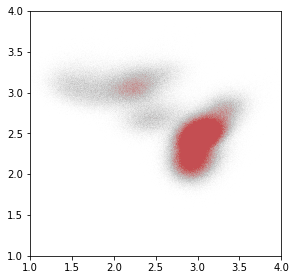

In [69]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_all, rmsd_open_all, marker="o", ms=0.05, ls='None', c="#C44E52", alpha=0.02)

# ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02) 

ax.set_xlim(1,4)
ax.set_ylim(1, 4)

# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))

# fig.tight_layout()
fig.savefig('./plots/rmsd_wo_IPA.png', dpi=400)

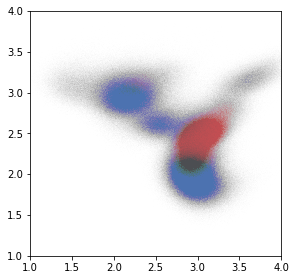

In [73]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

#ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=5, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
ax.plot(rmsd_closed_all, rmsd_open_all, marker="o", ms=0.05, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa_all, rmsd_open_ipa_all, marker="o", ms=0.05, ls='None', c="#4C72B0", alpha=0.02) 

ax.set_xlim(1,4)
ax.set_ylim(1, 4)

# ax.set_xticks(np.arange(0, 5, 0.5))
# ax.set_yticks(np.arange(0, 5, 0.5))

# fig.tight_layout()
fig.savefig('./plots/rmsd_w_wo_IPA.png', dpi=400)

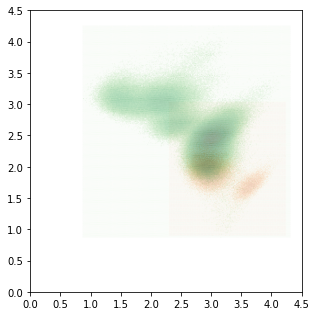

In [147]:
fig,ax=plt.subplots(figsize=(4.5,4.5))


ax.hexbin(rmsd_closed_ipa, rmsd_open_ipa, cmap="Oranges", alpha=0.5, bins='log',
          gridsize=200, edgecolors='none', linewidths=0.0) 
ax.hexbin(rmsd_closed, rmsd_open,cmap="Greens", alpha=0.5, bins='log',
          gridsize=200, edgecolors='none', linewidths=0.0) 



ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()

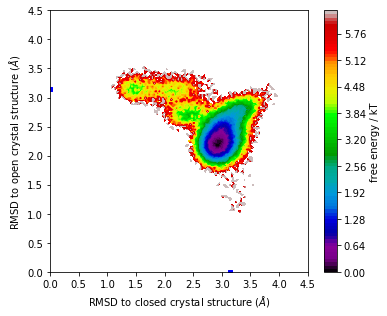

In [15]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list3 = sorted(glob(indir+'/open*.nc'))

results_open_openonly=[]
results_closed_openonly=[]
for t in traj_list3:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_openonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_openonly.append(rmsd_closed_openonly)
    
    rmsd_open_openonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_openonly.append(rmsd_open_openonly)

rmsd_open_openonly=np.concatenate(results_open_openonly, axis=0)
rmsd_closed_openonly=np.concatenate(results_closed_openonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_openonly, rmsd_open_openonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_openonly_dt2_cmap.png', dpi=800)

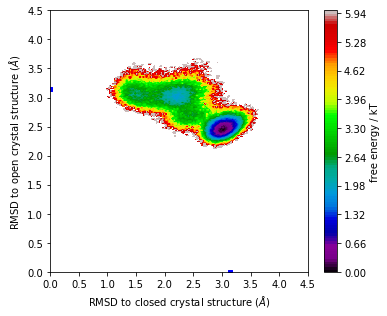

In [16]:
indir = './traj_dry_open_closed_adapt_all'
topfile = './parm_rst/open10_dry.parm7'
from glob import glob
traj_list4 = sorted(glob(indir+'/closed*.nc'))

results_open_closedonly=[]
results_closed_closedonly=[]
for t in traj_list4:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=100,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedonly_dt2_cmap.png', dpi=800)

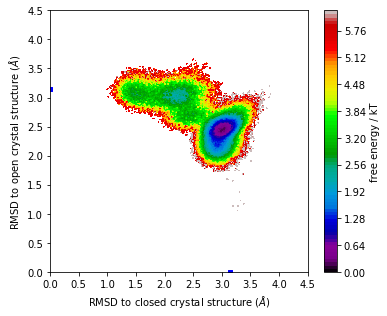

In [17]:
traj_list=traj_list4+traj_list3
for t in traj_list:
    traj=pt.load(t, topfile, stride=2)
    rmsd0=pt.rmsd(traj,ref=rf0, mask="@CA,N,C,O")
    rmsd1=pt.rmsd(traj,ref=rf1, mask="@CA,N,C,O")
    rmsd2=pt.rmsd(traj,ref=rf2, mask="@CA,N,C,O")
    rmsd3=pt.rmsd(traj,ref=rf3, mask="@CA,N,C,O")
    rmsd4=pt.rmsd(traj,ref=rf4, mask="@CA,N,C,O")
    rmsd5=pt.rmsd(traj,ref=rf5, mask="@CA,N,C,O")
    
    rmsd_closed_closedonly=np.nanmin(np.array([rmsd0,rmsd1,rmsd2,rmsd3,rmsd4,rmsd5]), axis=0)
    results_closed_closedonly.append(rmsd_closed_closedonly)
    
    rmsd_open_closedonly=pt.rmsd(traj,ref=rfopen, mask="@CA,N,C,O")
    results_open_closedonly.append(rmsd_open_closedonly)

rmsd_open_closedonly=np.concatenate(results_open_closedonly, axis=0)
rmsd_closed_closedonly=np.concatenate(results_closed_closedonly, axis=0)

fig, ax = plt.subplots(figsize=(5.5,4.5))

pyemma.plots.plot_free_energy(rmsd_closed_closedonly, rmsd_open_closedonly, nbins=200,ax=ax, cbar=True)

ax.scatter(x=0.0, y=3.1458, s=20, c="b", marker="s")
ax.scatter(x=3.1458, y=0.0, s=20, c="b", marker="s")

ax.set_xlabel(r'RMSD to closed crystal structure ($\AA$)')
ax.set_ylabel(r'RMSD to open crystal structure ($\AA$)')

ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

ax.set_xticks(np.arange(0, 5, 0.5))
ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()
fig.savefig('./plots/FES_rmsd_closedopenonly_dt2_cmap.png', dpi=800)

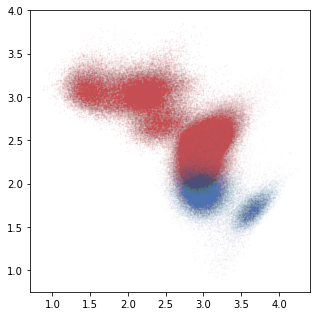

In [18]:
fig,ax=plt.subplots(figsize=(4.5,4.5))

ax.plot(rmsd_closed_closedonly, rmsd_open_closedonly, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02) 
#ax.plot(rmsd_closed_openonly, rmsd_open_openonly, marker="o", ms=5, ls='None', c="#4C72B0", alpha=0.02) 
#ax.plot(rmsd_closed, rmsd_open, marker="o", ms=1, ls='None', c="#C44E52", alpha=0.02)

ax.plot(rmsd_closed_ipa, rmsd_open_ipa, marker="o", ms=1, ls='None', c="#4C72B0", alpha=0.02) 

#ax.set(xlim=(0,4.5) , ylim=(0, 4.5))

#ax.set_xticks(np.arange(0, 5, 0.5))
#ax.set_yticks(np.arange(0, 5, 0.5))

fig.tight_layout()